In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
tc1=pd.read_csv("C:/Users/Hp/Downloads/telecom_churn_A.csv")

In [38]:
tc1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_pred,churn_pred.1
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Yes


In [39]:
# shape of the csv file 
tc1.shape

(7043, 22)

In [40]:
# size of the csv file
tc1.size

154946

In [41]:
tc1.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7037.0,32.375018,24.565651,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [42]:
tc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7037 non-null   float64
 6   PhoneService      7037 non-null   object 
 7   MultipleLines     7037 non-null   object 
 8   InternetService   7037 non-null   object 
 9   OnlineSecurity    7037 non-null   object 
 10  OnlineBackup      7037 non-null   object 
 11  DeviceProtection  7037 non-null   object 
 12  TechSupport       7037 non-null   object 
 13  StreamingTV       7037 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
tc1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              6
PhoneService        6
MultipleLines       6
InternetService     6
OnlineSecurity      6
OnlineBackup        6
DeviceProtection    6
TechSupport         6
StreamingTV         6
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
churn_pred          0
churn_pred.1        0
dtype: int64

In [45]:
# Drop rows with any missing values
tc= tc.dropna()

In [46]:
col=['gender','MultipleLines','InternetService','Contract','PaymentMethod']
# Remaining columns are having values like 'yes' and 'no'
for i in col:
    print(i)
    print(tc[i].unique())
    print(tc[i].nunique())
    print()

gender
[0 1]
2

MultipleLines
[0 1]
2

InternetService
[0 1 2]
3

Contract
[0 1 2]
3

PaymentMethod
[2 3 0 1]
4



In [47]:
tc['MultipleLines']=tc['MultipleLines'].replace(['No phone service'],'No')

C:\Users\Hp\AppData\Local\Temp\ipykernel_12276\1489409043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tc['MultipleLines']=tc['MultipleLines'].replace(['No phone service'],'No')


In [48]:
tc['MultipleLines'].unique()

array([0, 1])

In [49]:
tc.head()

,gender,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,churn_pred,churn_pred.1
0,0,1.0,0,0,0,0,2,0,0,0,2,29.85,0,0
1,1,34.0,1,0,0,2,0,2,0,1,3,56.95,0,0
2,1,2.0,1,0,0,2,2,0,0,0,3,53.85,1,1
3,1,45.0,0,0,0,2,0,2,2,1,0,42.30,0,0
4,0,2.0,1,0,1,0,0,0,0,0,2,70.70,1,1


In [50]:
# Correlation of this data is given by:

tc.corr()

,gender,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,churn_pred,churn_pred.1
gender,1.000000,0.004944,-0.006581,-0.008179,-0.001106,-0.014930,-0.012262,0.000674,-0.007060,0.000189,0.017523,-0.014556,-0.008448,-0.008448
tenure,0.004944,1.000000,0.008502,0.331913,-0.030783,0.326273,0.370617,0.371052,0.323589,0.671773,-0.370851,0.248091,-0.352655,-0.352655
PhoneService,-0.006581,0.008502,1.000000,0.279865,0.387612,-0.015439,0.024245,0.003963,-0.019289,0.002312,-0.004124,0.247455,0.011905,0.011905
MultipleLines,-0.008179,0.331913,0.279865,1.000000,0.010994,0.002770,0.119586,0.118650,0.006125,0.107508,-0.170535,0.490347,0.039293,0.039293
InternetService,-0.001106,-0.030783,0.387612,0.010994,1.000000,-0.028071,0.035817,0.044684,-0.025641,0.099439,0.085984,-0.323303,-0.047471,-0.047471
OnlineSecurity,-0.014930,0.326273,-0.015439,0.002770,-0.028071,1.000000,0.186301,0.176847,0.284579,0.375053,-0.096853,-0.053984,-0.289368,-0.289368
OnlineBackup,-0.012262,0.370617,0.024245,0.119586,0.035817,0.186301,1.000000,0.187483,0.196572,0.281016,-0.124927,0.119877,-0.196008,-0.196008
DeviceProtection,0.000674,0.371052,0.003963,0.118650,0.044684,0.176847,0.187483,1.000000,0.241152,0.350088,-0.136313,0.164147,-0.178057,-0.178057
TechSupport,-0.007060,0.323589,-0.019289,0.006125,-0.025641,0.284579,0.196572,0.241152,1.000000,0.425743,-0.105286,-0.008464,-0.281969,-0.281969
Contract,0.000189,0.671773,0.002312,0.107508,0.099439,0.375053,0.281016,0.350088,0.425743,1.000000,-0.228638,-0.073580,-0.396644,-0.396644


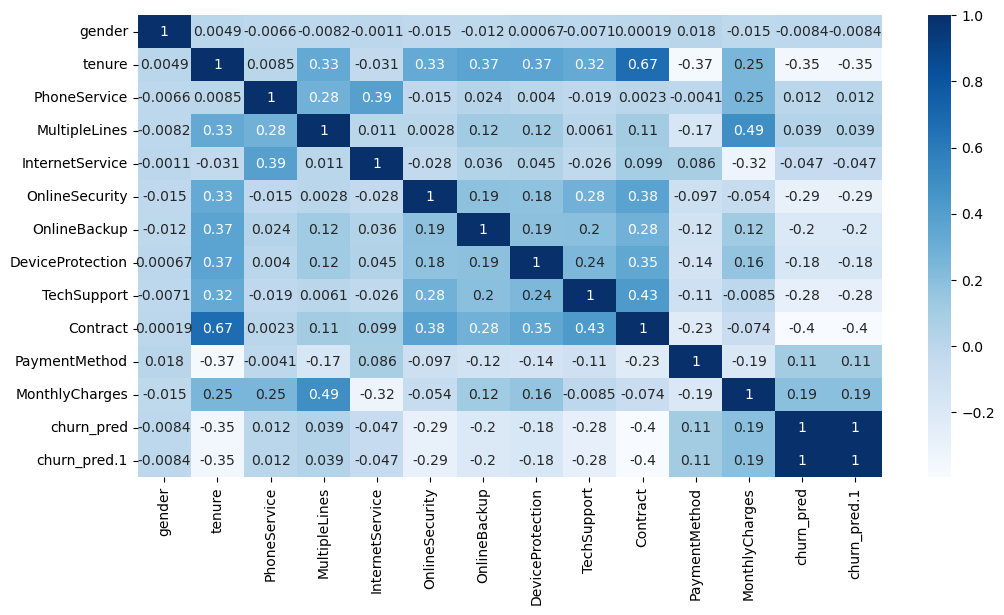

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(tc.corr(),annot=True,cmap='Blues')
plt.show()

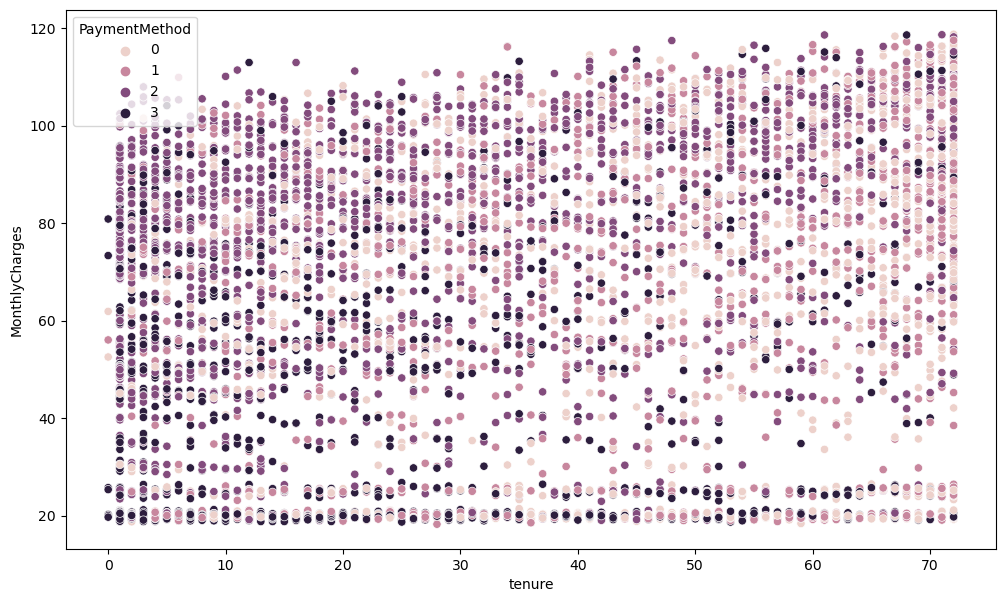

In [53]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='tenure',y='MonthlyCharges',data=tc,hue='PaymentMethod')
plt.show()

In [55]:
tc.head()

,gender,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,churn_pred,churn_pred.1
0,0,1.0,0,0,0,0,2,0,0,0,2,29.85,0,0
1,1,34.0,1,0,0,2,0,2,0,1,3,56.95,0,0
2,1,2.0,1,0,0,2,2,0,0,0,3,53.85,1,1
3,1,45.0,0,0,0,2,0,2,2,1,0,42.30,0,0
4,0,2.0,1,0,1,0,0,0,0,0,2,70.70,1,1


In [59]:
#Using Label Encoder to transform categorical values
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for col in tc.columns:
    if tc[col].dtype=='object':
        tc[col]=l.fit_transform(tc[col])

In [60]:
tc.head()

,gender,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,churn_pred,churn_pred.1
0,0,1.0,0,0,0,0,2,0,0,0,2,29.85,0,0
1,1,34.0,1,0,0,2,0,2,0,1,3,56.95,0,0
2,1,2.0,1,0,0,2,2,0,0,0,3,53.85,1,1
3,1,45.0,0,0,0,2,0,2,2,1,0,42.30,0,0
4,0,2.0,1,0,1,0,0,0,0,0,2,70.70,1,1


In [61]:
#Splitting data for training and testing :
x=tc.drop('churn_pred',axis=1)
y=tc['churn_pred']

In [62]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [63]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
xtrain=mms.fit_transform(xtrain)
xtest=mms.fit_transform(xtest)
xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)

In [64]:
Res={'Model':[],'Accuracy':[],'Recall':[],'Precision':[],'F1':[]}

In [65]:
Results=pd.DataFrame(Res)
Results.head()

,Model,Accuracy,Recall,Precision,F1


In [66]:
#Importing Machine Learning Algorithms :
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 

lr=LogisticRegression()
dc=DecisionTreeClassifier()
rf=RandomForestClassifier()
et=ExtraTreesClassifier()
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
gnb=GaussianNB()

model=[lr,dc,rf,et,knn,svm,gnb]

for models in model:
    models.fit(xtrain,ytrain)
    
    ypred=models.predict(xtest)
    print('Model :',models)
    print('-----------------------------------------------------------------------------------------------------------------------')
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
    
    print('confusion matrix :',confusion_matrix(ytest,ypred))
    print('classification report:',classification_report(ytest,ypred))
    print('accuracy :',round(accuracy_score(ytest,ypred),2))
    print('precision :',round(precision_score(ytest,ypred),2))
    print('recall :',round(recall_score(ytest,ypred),2))
    print('f1 :',round(f1_score(ytest,ypred),2))
    print()
    R={'Model':models,
             'Accuracy':round(accuracy_score(ytest,ypred),2),
             'Recall':round(recall_score(ytest,ypred),2),
             'Precision':round(precision_score(ytest,ypred),2),
             'F1':round(f1_score(ytest,ypred),2)
            }
    Results=Results.append(R,ignore_index=True)
    

Model : LogisticRegression()
-----------------------------------------------------------------------------------------------------------------------
confusion matrix : [[1557    0]
 [   0  555]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1557
           1       1.00      1.00      1.00       555

    accuracy                           1.00      2112
   macro avg       1.00      1.00      1.00      2112
weighted avg       1.00      1.00      1.00      2112

accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0

Model : DecisionTreeClassifier()
-----------------------------------------------------------------------------------------------------------------------
confusion matrix : [[1557    0]
 [   0  555]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1557
           1       1.00      1.00      1.00       555

    accuracy   

C:\Users\Hp\AppData\Local\Temp\ipykernel_12276\530131305.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results=Results.append(R,ignore_index=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_12276\530131305.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results=Results.append(R,ignore_index=True)


Model : RandomForestClassifier()
-----------------------------------------------------------------------------------------------------------------------
confusion matrix : [[1557    0]
 [   0  555]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1557
           1       1.00      1.00      1.00       555

    accuracy                           1.00      2112
   macro avg       1.00      1.00      1.00      2112
weighted avg       1.00      1.00      1.00      2112

accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0



C:\Users\Hp\AppData\Local\Temp\ipykernel_12276\530131305.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results=Results.append(R,ignore_index=True)


Model : ExtraTreesClassifier()
-----------------------------------------------------------------------------------------------------------------------
confusion matrix : [[1557    0]
 [   0  555]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1557
           1       1.00      1.00      1.00       555

    accuracy                           1.00      2112
   macro avg       1.00      1.00      1.00      2112
weighted avg       1.00      1.00      1.00      2112

accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0



C:\Users\Hp\AppData\Local\Temp\ipykernel_12276\530131305.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results=Results.append(R,ignore_index=True)


Model : KNeighborsClassifier()
-----------------------------------------------------------------------------------------------------------------------
confusion matrix : [[1557    0]
 [   6  549]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1557
           1       1.00      0.99      0.99       555

    accuracy                           1.00      2112
   macro avg       1.00      0.99      1.00      2112
weighted avg       1.00      1.00      1.00      2112

accuracy : 1.0
precision : 1.0
recall : 0.99
f1 : 0.99



C:\Users\Hp\AppData\Local\Temp\ipykernel_12276\530131305.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results=Results.append(R,ignore_index=True)


Model : SVC()
-----------------------------------------------------------------------------------------------------------------------
confusion matrix : [[1557    0]
 [   0  555]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1557
           1       1.00      1.00      1.00       555

    accuracy                           1.00      2112
   macro avg       1.00      1.00      1.00      2112
weighted avg       1.00      1.00      1.00      2112

accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0

Model : GaussianNB()
-----------------------------------------------------------------------------------------------------------------------
confusion matrix : [[1557    0]
 [   0  555]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1557
           1       1.00      1.00      1.00       555

    accuracy                           1.0

C:\Users\Hp\AppData\Local\Temp\ipykernel_12276\530131305.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results=Results.append(R,ignore_index=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_12276\530131305.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results=Results.append(R,ignore_index=True)
